# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
# X is the data that we want to plot.

# km is the k-means clustering algorithm that has already been fitted to the data, and num_clusters is the number of clusters that
  # we want to display. If num_clusters is not specified, the function will simply plot the data without any clustering.

# If num_clusters is 0, the function will simply plot the data without any clustering. Otherwise, the function will iterate over each 
  #cluster and plot the data points that belong to that cluster using a different color. It will also plot the center of each cluster
    # using an 'x' marker.

# Finally, the function will display the plot using the plt.scatter() function from the Matplotlib library.



def display_cluster(X,km=[],num_clusters=0):
    color = ['b','r','g','c','m','y','k','violet','teal','bisque','gold','navy','olive']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

# Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



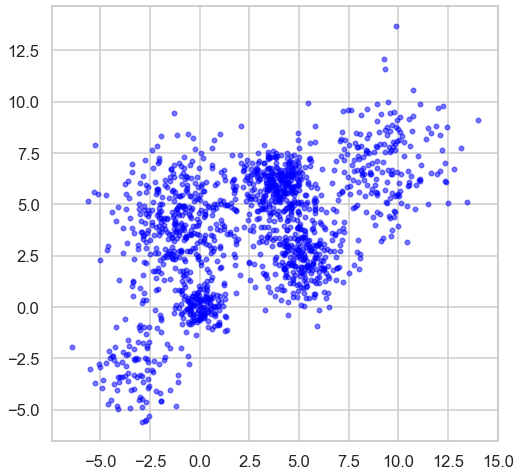

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

# n_bins = 6 sets the number of bins for the histograms that will be plotted later.
n_bins = 6  

# centers is a list of tuples that specifies the coordinates of the centers of each blob.
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]

# creates a dataset of blobs using the make_blobs() function from scikit-learn. This function generates a specified number of samples 
  # (n_samples) for each blob center (centers) with a specified number of features (n_features) and a specified standard deviation 
    # (cluster_std). The shuffle parameter is set to False to keep the blobs ordered by center.
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

# Finally, the display_cluster() function is called to display the blobs. The Multi_blob_Data argument is passed to the function to plot
  #  the data, and since the num_clusters parameter is not specified, the function will plot the data without any clustering.
display_cluster(Multi_blob_Data)

# Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

### Explaination

    K-means clustering is a popular unsupervised machine learning algorithm used to group data points into a predetermined number of clusters based on their similarity. The algorithm works by iteratively assigning each data point to the nearest cluster centroid and then recomputing the centroid based on the newly assigned data points. This process continues until the centroids no longer change significantly or a maximum number of iterations is reached. The result is a set of clusters, each represented by its centroid, that minimize the sum of squared distances between data points and their respective centroids. K-means clustering is widely used in data analysis, image processing, and other fields where pattern recognition and segmentation are important.


    The silhouette score is a metric that measures the quality of clustering in a range from -1 to 1. The score quantifies how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A high silhouette score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters, while a low silhouette score indicates that the object is poorly matched to its own cluster or well-matched to a neighboring cluster.


    The distortion measures the sum of squared distances between each data point and its assigned cluster center. It can be thought of as a measure of the quality of clustering, where a lower distortion indicates a better clustering.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# The function first defines a range of K values to test, and then loops over these K values. For each K value, it fits a KMeans model 
   # on the input data and calculates the distortion and silhouette score. It then plots the clustering results using the display_cluster
      #  function and shows the plots for each K value.


# After looping over all K values, the function plots the distortion and silhouette score versus K, and selects the best K based on the 
  # highest silhouette score. It then prints the best K and the corresponding silhouette score.

def kmeans_cluster(X):
    # Define the range of K values to test 2 inclusive 5 exclusive 
    K_range = range(2, 11)

    # Initialize empty arrays to store the distortion and silhouette scores
    distortions = []
    silhouette_scores = []

    # Loop over different values of K
    for K in K_range:
        # Fit the KMeans model
        k_mean = KMeans(n_clusters=K, random_state=42)
        k_mean.fit(X)

        # Calculate the distortion and silhouette score
        distortions.append(k_mean.inertia_)
        silhouette_scores.append(silhouette_score(X, k_mean.labels_))

        # Plot the clustering results
        plt.figure(figsize=(8, 8))
        display_cluster(X, k_mean, K)
        plt.title(f'KMeans clustering with K={K}')
        plt.show()

    # Plot the distortion function versus K
    plt.figure(figsize=(8, 8))
    plt.plot(K_range, distortions, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion versus K')
    plt.show()

    # Plot the silhouette score versus K
    plt.figure(figsize=(8, 8))
    plt.plot(K_range, silhouette_scores, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score versus K')
    plt.show()

    # Choose the best K based on the silhouette score
    best_K = np.argmax(silhouette_scores) + 2
    print(f'The best K based on silhouette score is {best_K}')

    # Store the silhouette score for the best K
    best_silhouette_score = silhouette_scores[best_K - 2]
    print(f'The silhouette score for the best K is {best_silhouette_score}')

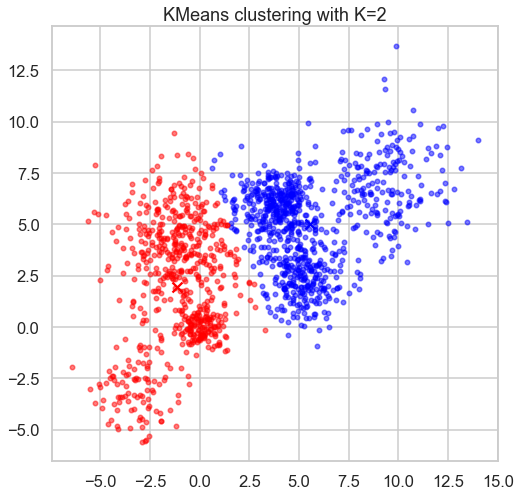

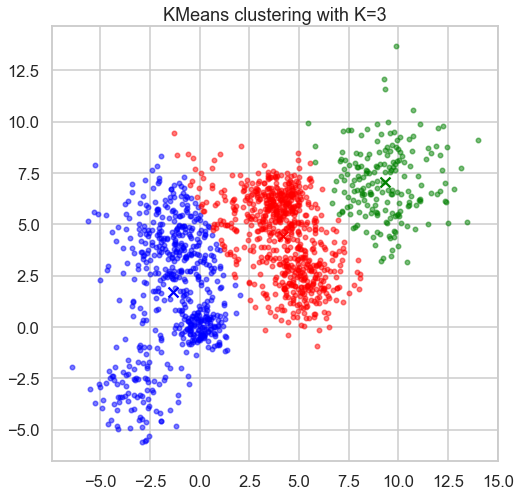

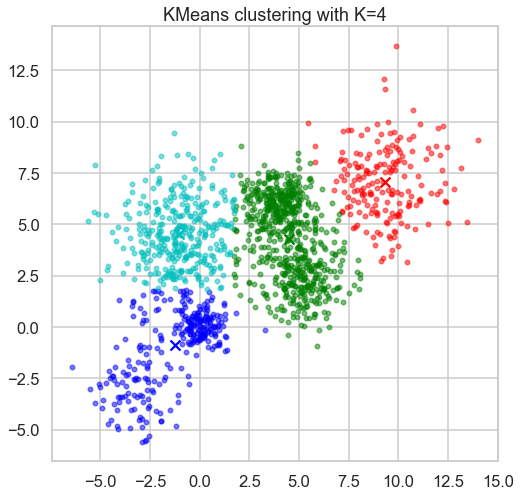

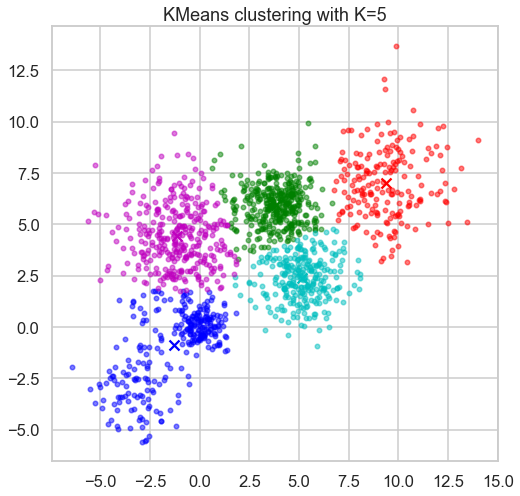

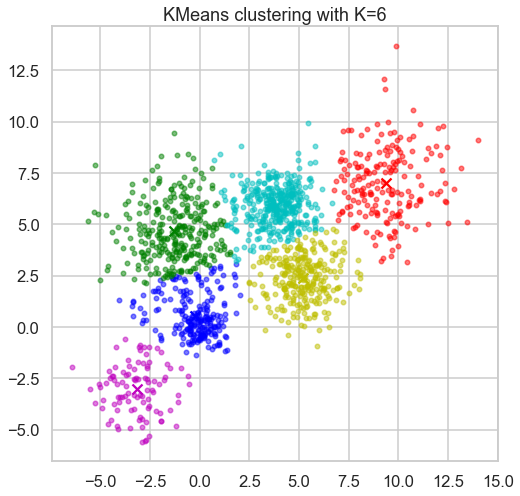

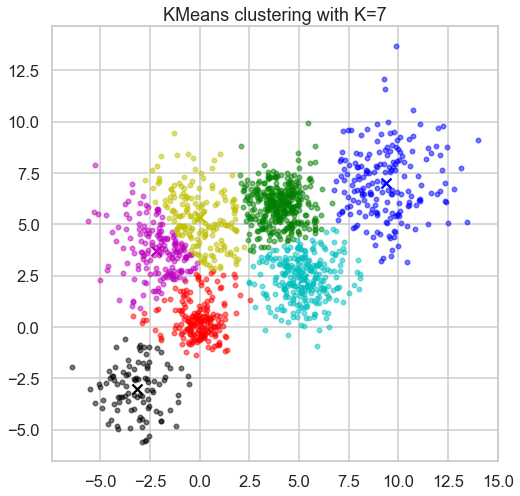

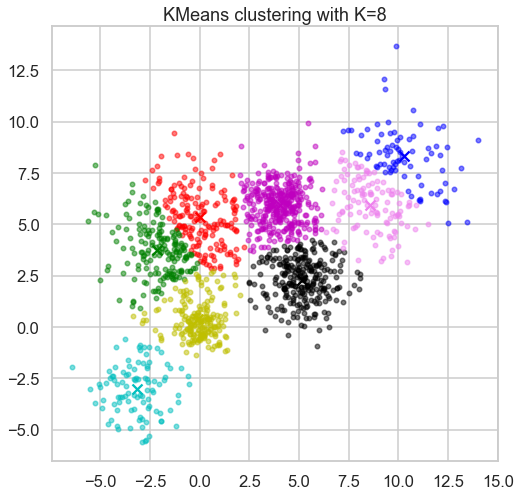

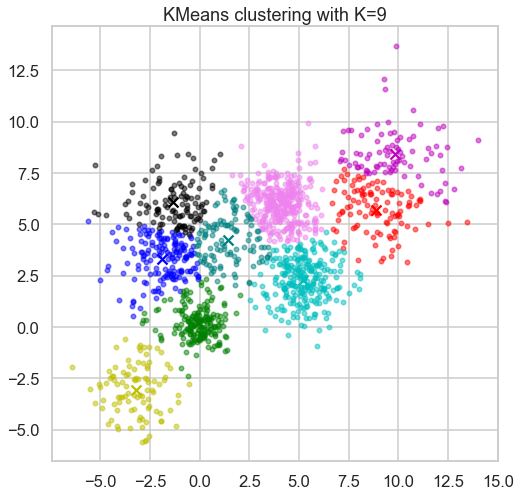

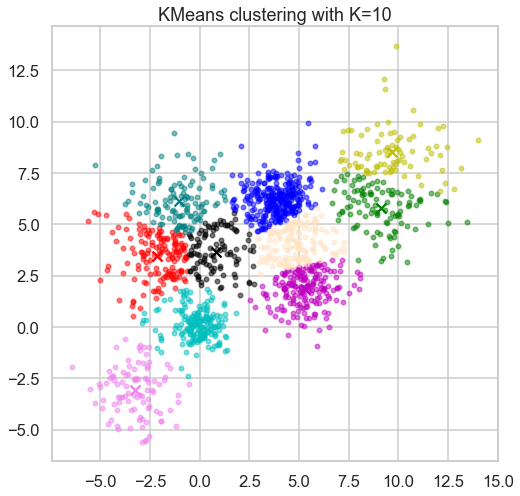

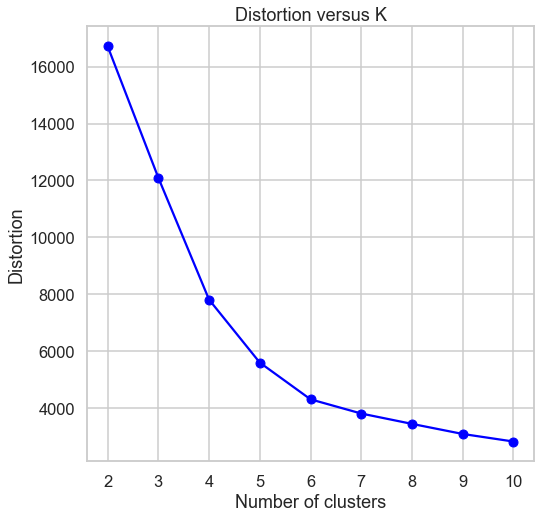

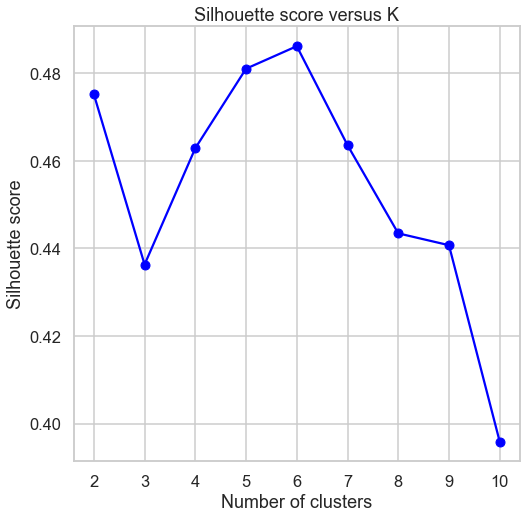

The best K based on silhouette score is 6
The silhouette score for the best K is 0.48614459735646176


In [6]:
kmeans_cluster(Multi_blob_Data)

# Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### Explaination 

    Hierarchical Clustering is a clustering technique that creates a hierarchy of clusters using a bottom-up approach. The technique starts by assigning each data point to its own cluster and then iteratively merges the closest clusters until all data points belong to a single cluster. The distance between two clusters is calculated using a linkage method, such as 'average' or 'single'. The resulting hierarchy of clusters can be visualized using a dendrogram, which displays the distance between clusters at each level of the hierarchy. Hierarchical Clustering can be performed using different distance metrics, such as 'cityblock' (Manhattan distance), 'euclidean', and 'cosine', to measure the distance between data points.


    By changing the hyperparameters, the output of the Agglomerative Clustering algorithm and the silhouette score can change. For example,
    changing the linkage criterion can lead to different cluster shapes and sizes, changing the affinity metric can lead to different
    distances between data points, and changing the number of clusters can lead to different levels of granularity in the clustering.
    The grid search allows the user to systematically explore these different hyperparameters to find the best set of 
    hyperparameters for the given data.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

def perform_grid_search(z):
    # define parameters to search over
    affinities = [ 'cityblock','euclidean', 'cosine']
    linkages = ['average', 'single']
    # num_clusters_range = range(2,3)
    distance_thresholds = np.arange(0.1,5,0.1)

    # perform grid search for best parameters
    best_score = -np.inf
    best_score_final = -np.inf
    best_params = {}
    for affinity in affinities:
        for linkage_type in linkages:
            if(affinity=='cosine' and linkage_type=='single'):
             distance_thresholds = np.arange(0.0001,0.1,0.0003)
            for distance_threshold in distance_thresholds:
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold)
                if(len(np.unique(model.fit_predict(z)))>1):
                  cluster_labels = model.fit_predict(z)
                  score = silhouette_score(z, cluster_labels)
                  # plot dendrogram and clusters

                  # check if this set of parameters yields a better score
                  if score > best_score:
                      best_score = score
                      best_model = model
                      best_threshold = distance_threshold
                      
                  if score > best_score_final:
                      best_score_final = score
                      best_model_final = model 
                      best_best_threshold = distance_threshold
                      best_params = {'affinity': affinity, 'linkage': linkage_type, 'num_clusters':  {best_model_final.n_clusters_}, 'distance_threshold': best_best_threshold}
            fig, ax = plt.subplots(1, 2, figsize=(16, 8))
            if affinity != 'cityblock':
                fig.suptitle(f"({affinity}, {linkage_type}, {best_model.n_clusters_}, {best_threshold})")
            else:
                fig.suptitle(f"({'Manhattan'}, {linkage_type},  {best_model.n_clusters_}, {best_threshold})")

            Z = linkage(z, method=linkage_type, metric=affinity)
            dendrogram(Z, ax=ax[0], truncate_mode='level', p=5, show_contracted=True)
            ax[0].set_title("Dendrogram")
            ax[1].scatter(z[:,0], z[:,1], c=best_model.labels_, cmap='Set1')
            ax[1].set_title(f"Silhouette Score: {score}")
            plt.show()
            best_score = -np.inf
    # print best parameters and score
    print(f"Best parameters: {best_params}")
    print(f"Best silhouette score: {best_score_final}")



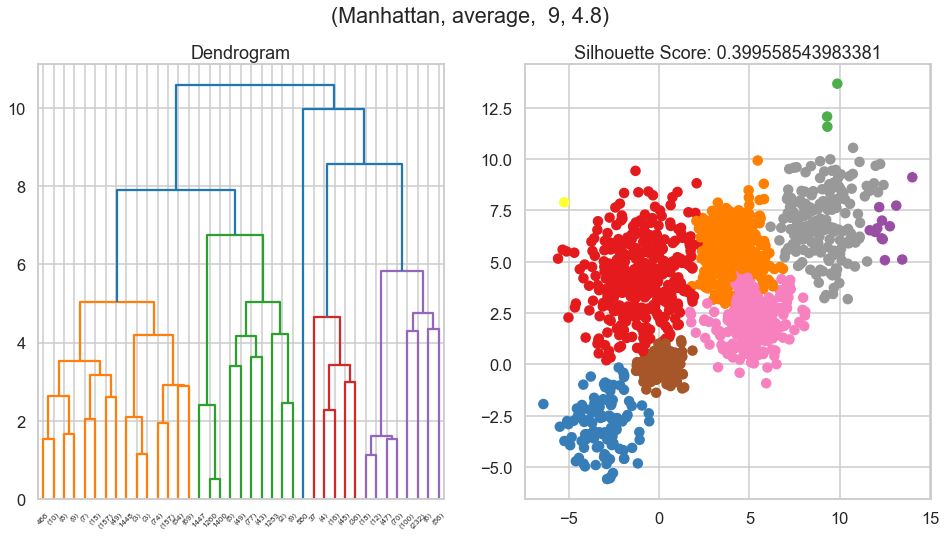

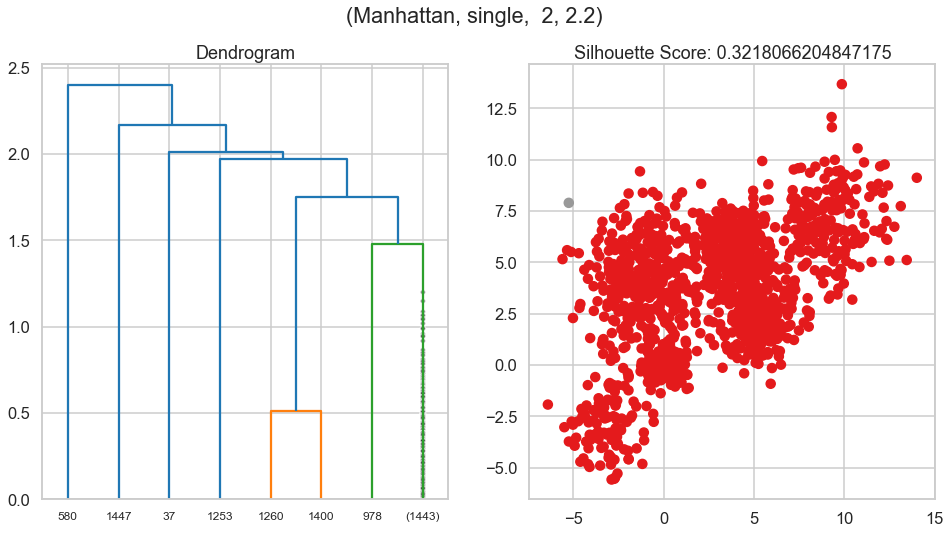

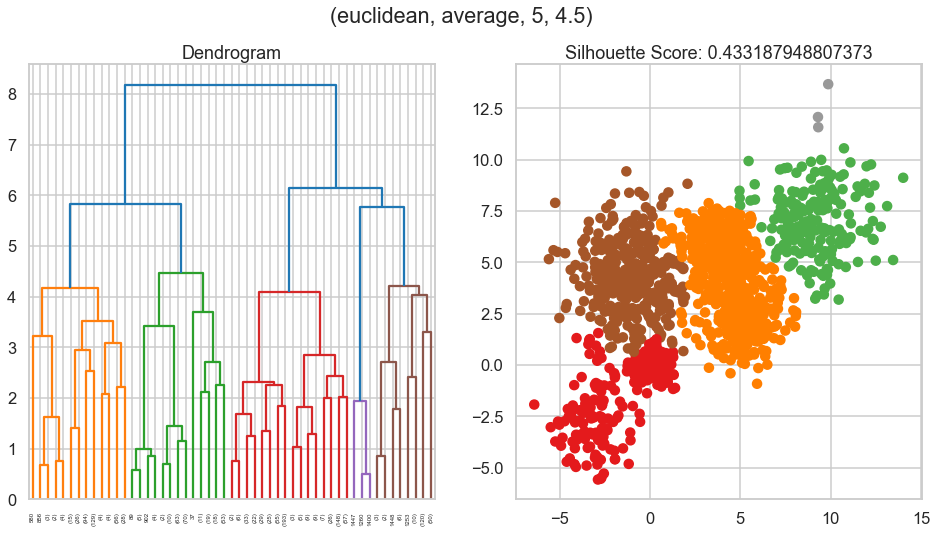

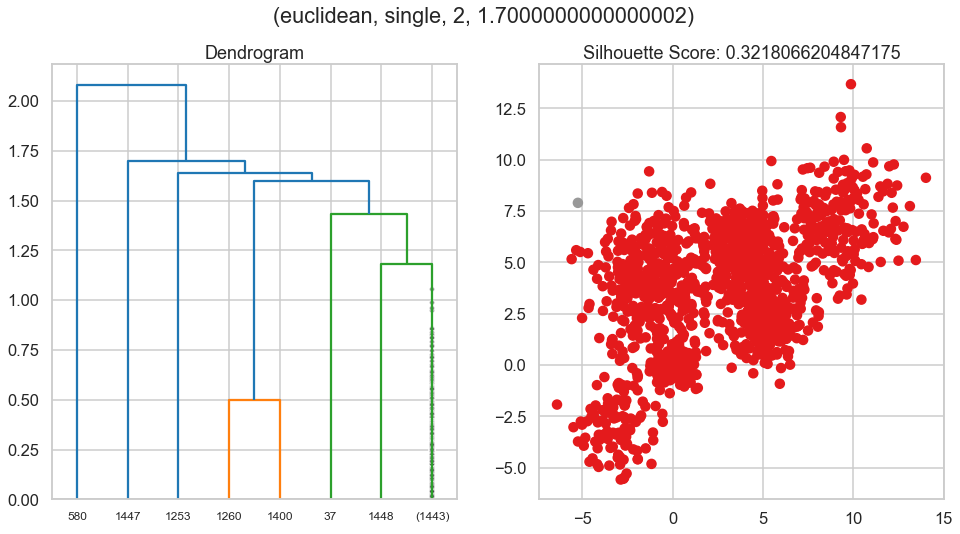

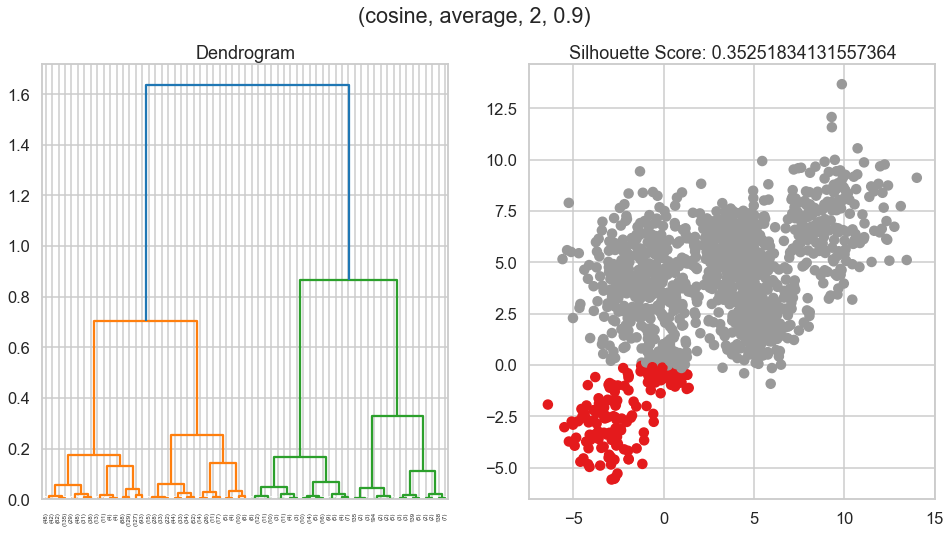

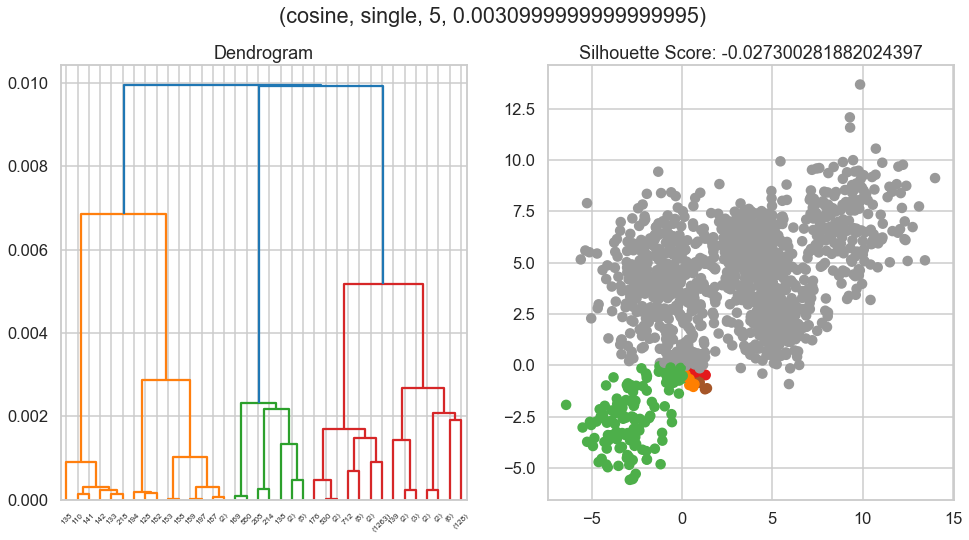

Best parameters: {'affinity': 'euclidean', 'linkage': 'average', 'num_clusters': {5}, 'distance_threshold': 4.5}
Best silhouette score: 0.433187948807373


In [40]:
perform_grid_search(Multi_blob_Data)

# DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Explaination

    This code performs density-based clustering on a 2D dataset using the DBSCAN algorithm from the scikit-learn library. The goal is to find groups of closely located data points based on their density.

    The DBSCAN algorithm works by defining a neighborhood around each point and counting the number of points within that neighborhood. If the number of points is greater than a threshold value (called min_samples), then the point is considered a core point. Points that are not core points but are still within the neighborhood of a core point are considered border points. Points that do not fall within the neighborhood of any core point are considered noise points.

    The algorithm proceeds by forming clusters around core points and border points that belong to the same cluster. The distance between points is controlled by the epsilon (eps) parameter, which defines the maximum distance between two points for them to be considered neighbors.

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Helper function to plot DBSCAN clusters
def plot_dbscan_clusters(X, labels, title):
    # Get unique labels and set noise points to -1
    unique_labels = set(labels)
    unique_labels.discard(-1)
    noise_mask = (labels == -1)
    
    # Create scatter plot for each cluster
    for label in unique_labels:
        mask = (labels == label)
        plt.scatter(X[mask, 0], X[mask, 1])
    # Create scatter plot for noise points
    if np.sum(noise_mask) > 0:
        plt.scatter(X[noise_mask, 0], X[noise_mask, 1])
    plt.title(title)
    plt.legend()
    plt.show()
def dbscanfunction(z):
    # Parameter variations
    eps_range = np.arange(0.1, 3.1, 0.1)
    min_samples_range = range(5, 26)

    # Store best silhouette score and corresponding parameters
    best_silhouette_score = -1
    best_params = None

    # Silhouette score vs. parameter variations plot
    silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))
    for i, eps in enumerate(eps_range):
        for j, min_samples in enumerate(min_samples_range):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(z)
            if np.max(labels) > 0:
                score = silhouette_score(z, labels)
                silhouette_scores[i, j] = score
                if score > best_silhouette_score:
                    best_silhouette_score = score
                    best_params = (eps, min_samples)

    plt.figure(figsize=(10, 6))
    plt.imshow(silhouette_scores, cmap='coolwarm')
    plt.colorbar()
    plt.yticks(range(len(min_samples_range)), min_samples_range)
    plt.yticks(range(len(eps_range)), eps_range)
    plt.xlabel('Min Samples')
    plt.ylabel('EPS')
    plt.title('Silhouette Score vs. Parameter Variations')
    plt.show()

    # DBSCAN clustering plot with best parameters
    dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
    labels = dbscan.fit_predict(z)
    plot_dbscan_clusters(z, labels, f'DBSCAN Clustering (Silhouette Score: {best_silhouette_score:.3f}, eps={best_params[0]}, min_samples={best_params[1]})')


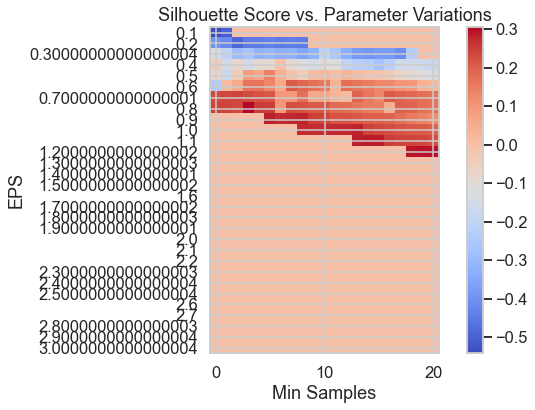

No handles with labels found to put in legend.


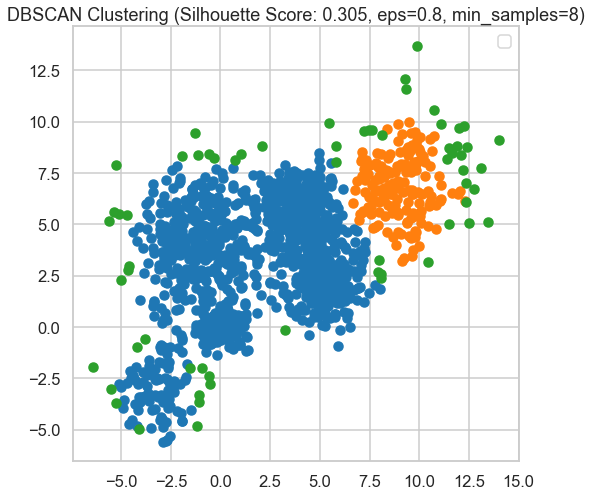

In [9]:
dbscanfunction(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def gaussian(z):
    # define the number of clusters
    num_clusters = 6
    cov_types = ['full', 'diag', 'spherical']
    num_of_clusters = range(6,9)
    
    best_scores = {}
    best_clusters = {}
    
    for cov_type in cov_types:
        max_score = -1
        best_cluster = -1
        
        # fit a GMM model to the data
        for num_ofclusters in num_of_clusters:
            gmm = GaussianMixture(n_components=num_ofclusters, covariance_type=cov_type)
            gmm.fit(z)

            # predict the cluster labels
            labels = gmm.predict(z)
            
            # calculate the silhouette score
            score = silhouette_score(z, labels)

            # update the best score and number of clusters if the current score is higher
            if score > max_score:
                max_score = score
                best_cluster = num_ofclusters

            # plot the results only for the best score
            if num_ofclusters == best_cluster:
                plt.figure(figsize=(8, 6))
                plt.scatter(z[:, 0], z[:, 1], c=labels)
                plt.title('GMM Clustering with covariance_type = ' + cov_type + "  " + f"Compnent no.: {num_ofclusters}")
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')

                # plot the contours of the GMM components
                x, y = np.meshgrid(np.linspace(z[:, 0].min(), z[:, 0].max()),np.linspace(z[:, 0].min(), z[:, 0].max()))
                XX = np.array([x.ravel(), y.ravel()]).T
                Z = -gmm.score_samples(XX)
                Z = Z.reshape(x.shape)
                plt.contour(x, y, Z, levels=np.logspace(0, 2, 12), alpha=0.5)

                # plot the total Gaussian mixture
                Z = -gmm.score_samples(XX)
                Z = Z.reshape(x.shape)
                plt.contour(x, y, Z, levels=[np.exp(-2), np.exp(-1), np.exp(-0.5), np.exp(-0.1)], colors='k', alpha=0.8)
                plt.show()
        
        # store the best score and number of clusters for the current covariance type
        best_scores[cov_type] = round(max_score, 5)
        best_clusters[cov_type] = best_cluster
        
    # print the best score and number of clusters for each covariance type
    for cov_type in cov_types:
        print(f"Best score for covariance type '{cov_type}': {best_scores[cov_type]}, with {best_clusters[cov_type]} clusters.")


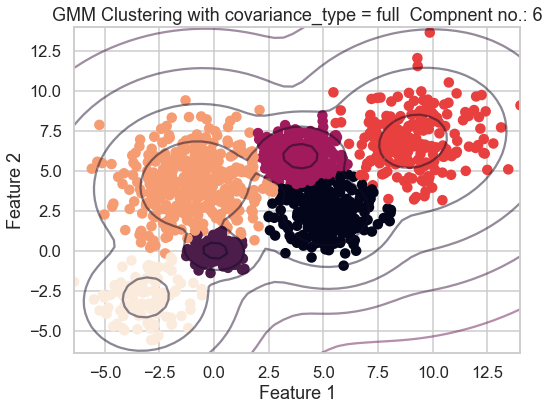

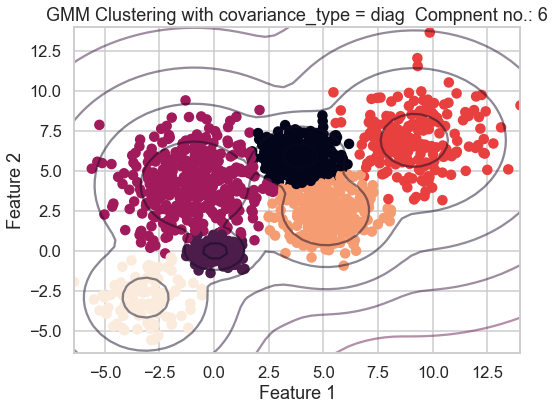

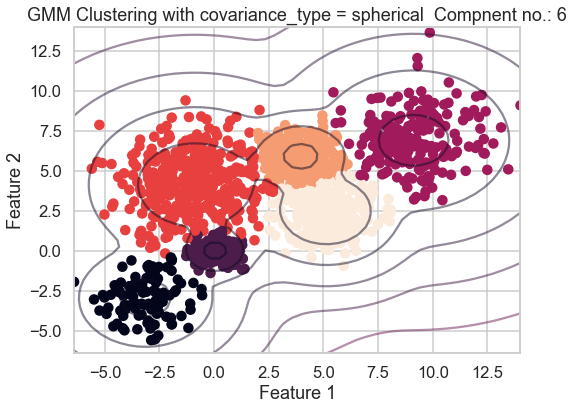

Best score for covariance type 'full': 0.45288, with 6 clusters.
Best score for covariance type 'diag': 0.45426, with 6 clusters.
Best score for covariance type 'spherical': 0.45437, with 6 clusters.


In [11]:
gaussian(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [12]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

### KMEANS Iris


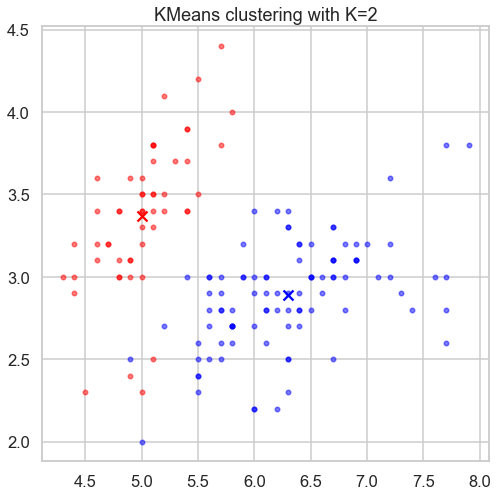

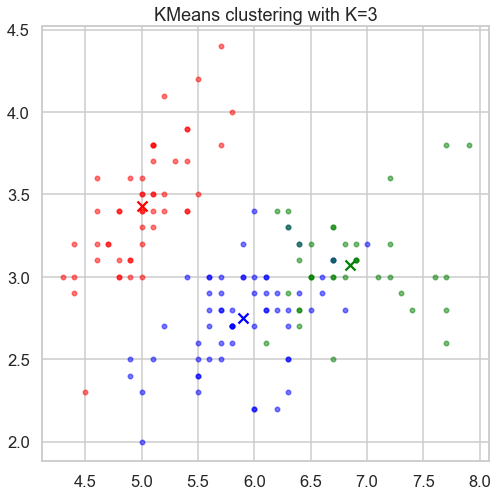

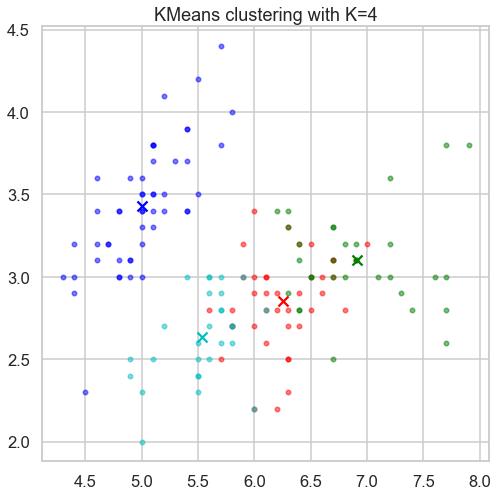

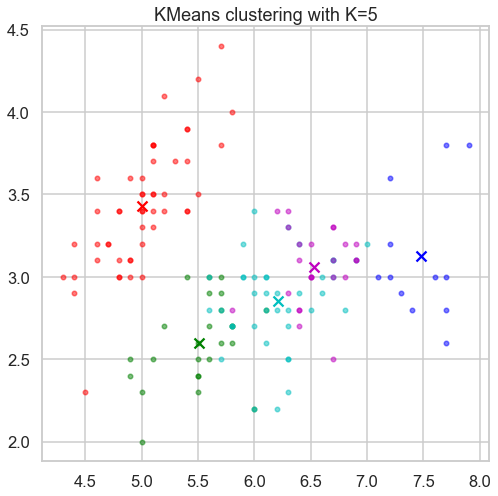

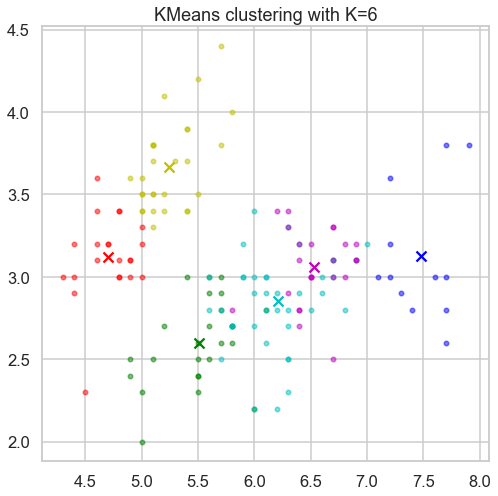

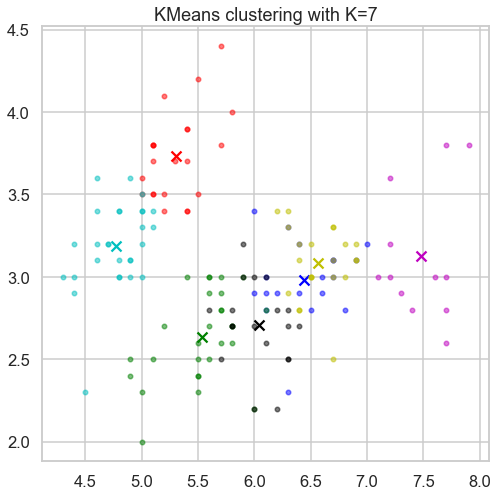

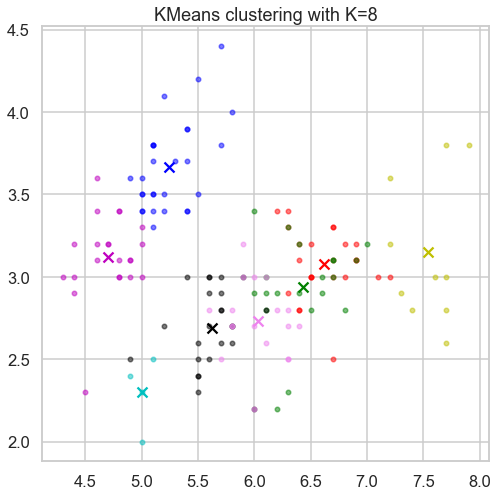

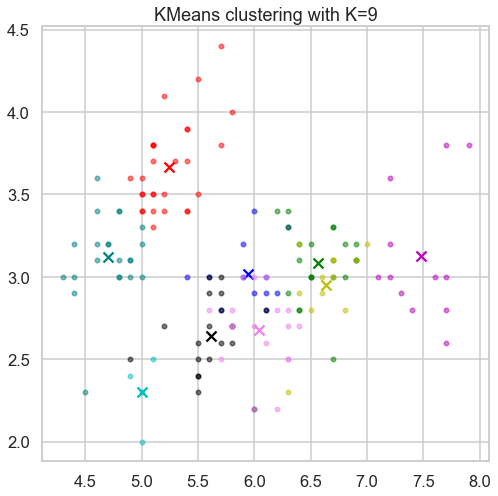

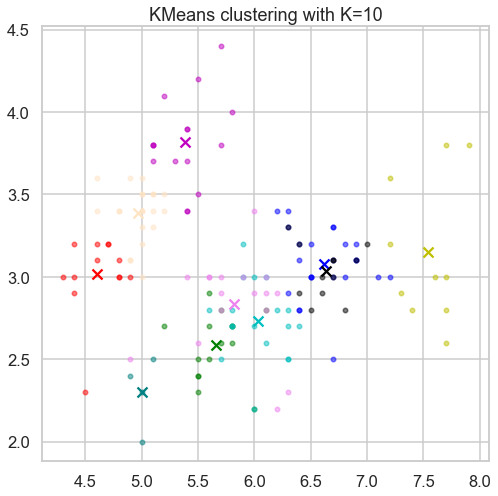

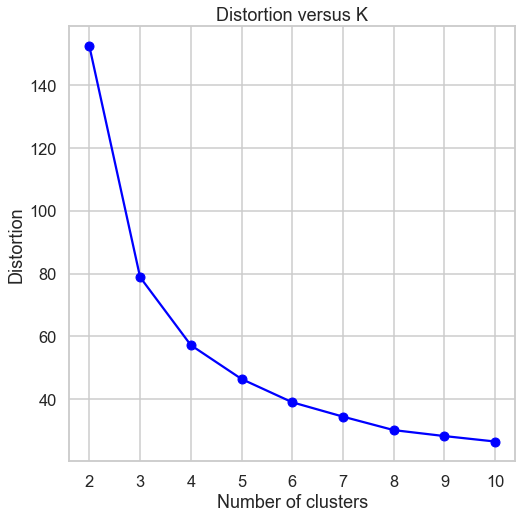

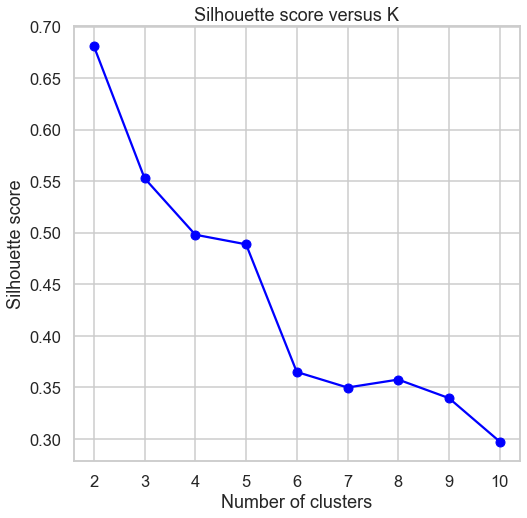

The best K based on silhouette score is 2
The silhouette score for the best K is 0.681046169211746


In [13]:
kmeans_cluster(iris_data.data)




# The kmeans function above can be applied on the iris dataset to cluster the samples into different groups based on their feature values. 
   # The iris dataset is a classic dataset in machine learning and consists of 150 samples, each with 4 features: sepal length, sepal width,
      #  petal length, and petal width. The samples belong to one of three different species of iris flowers.

# When the kmeans function is applied to the iris dataset, it will try to group the samples into k clusters based on their feature values.
   #  The number of clusters k is a hyperparameter that needs to be set before running the algorithm. 
      # In this case, the default value of k is 2.

# The resulting output of the kmeans function will be a set of k cluster centroids and a set of labels indicating which 
  # cluster each sample belongs to. The quality of the clustering can be evaluated using various metrics such as the within-cluster
    #  sum of squares (WSS) or the silhouette score.

### Hierarchal Clustering Iris


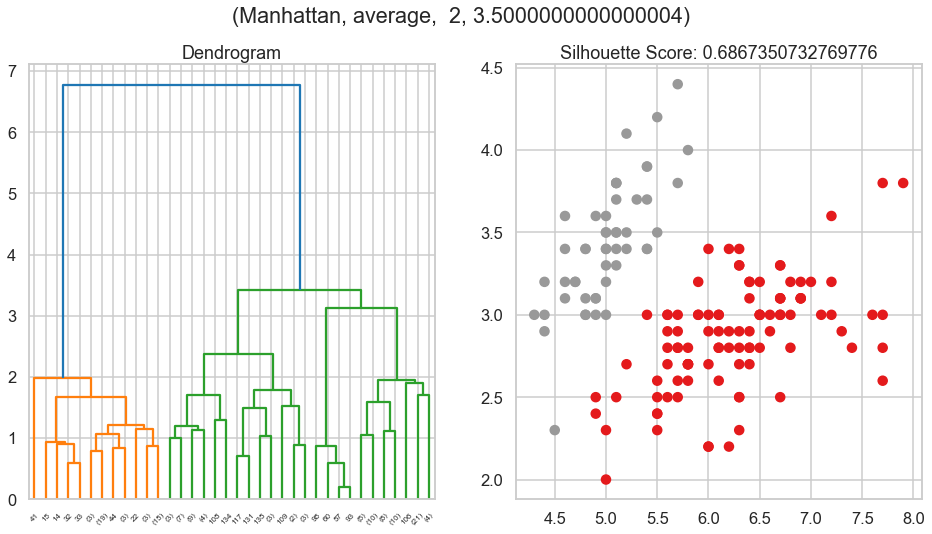

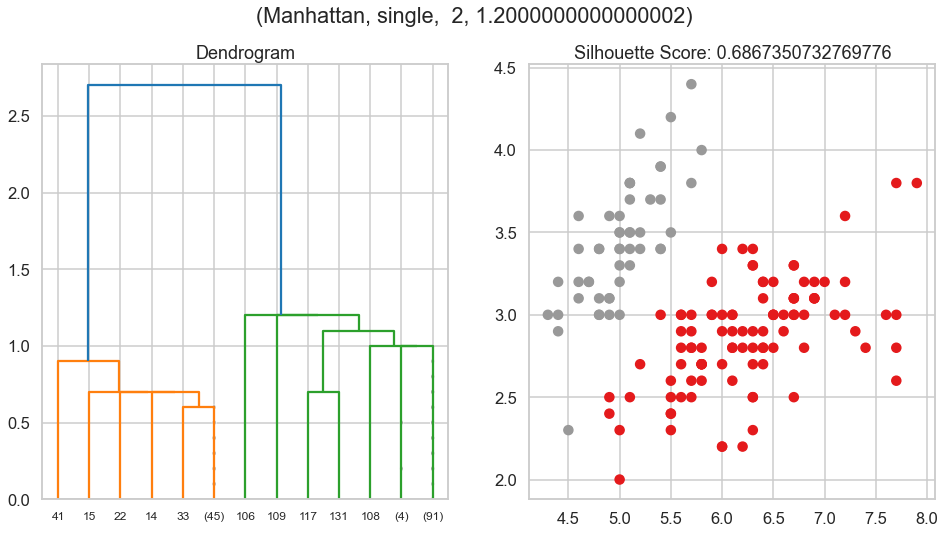

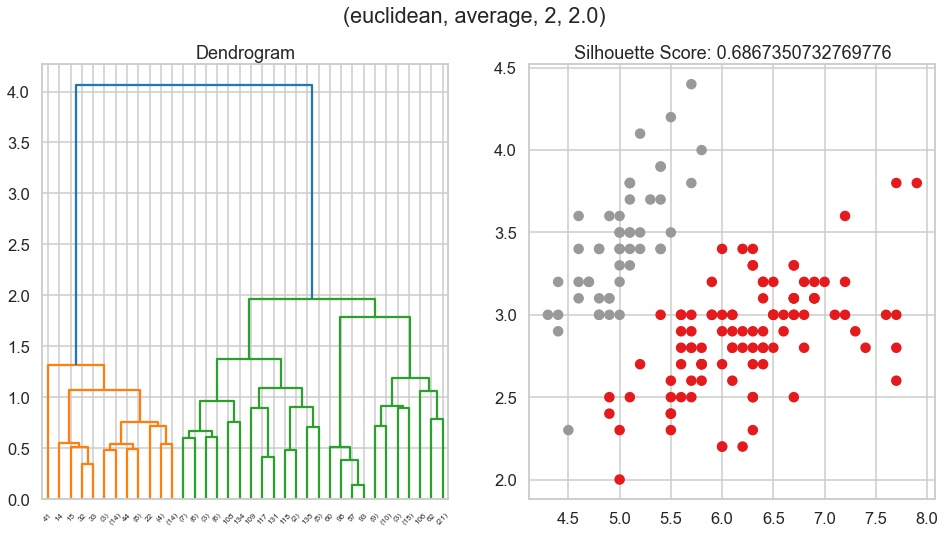

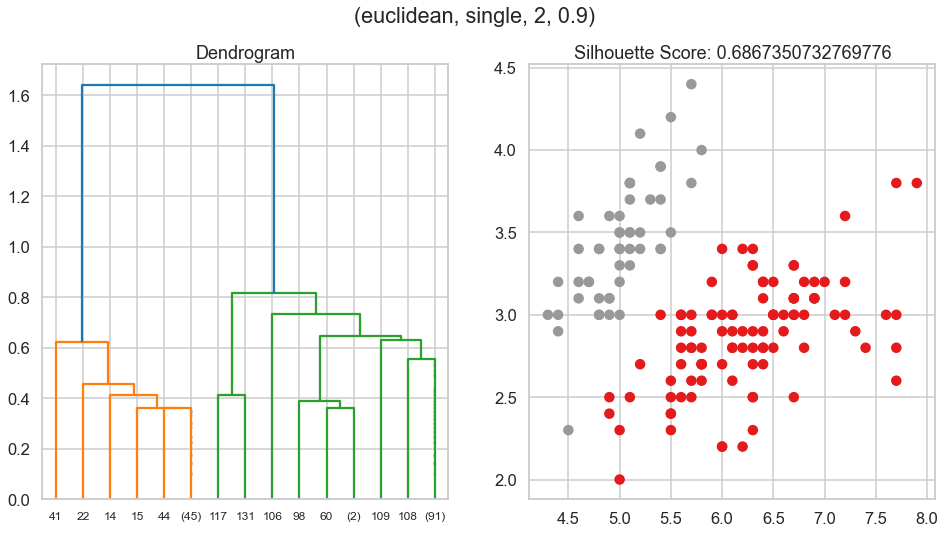

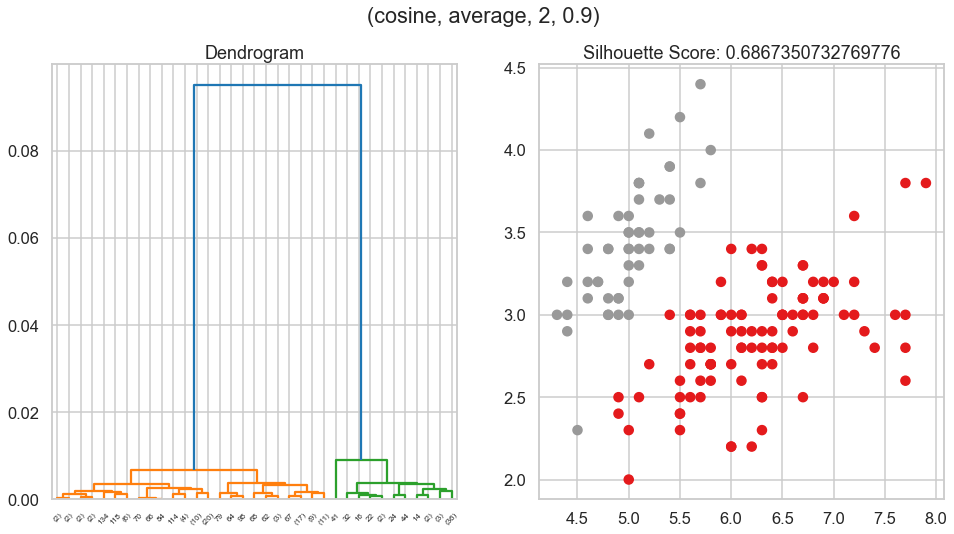

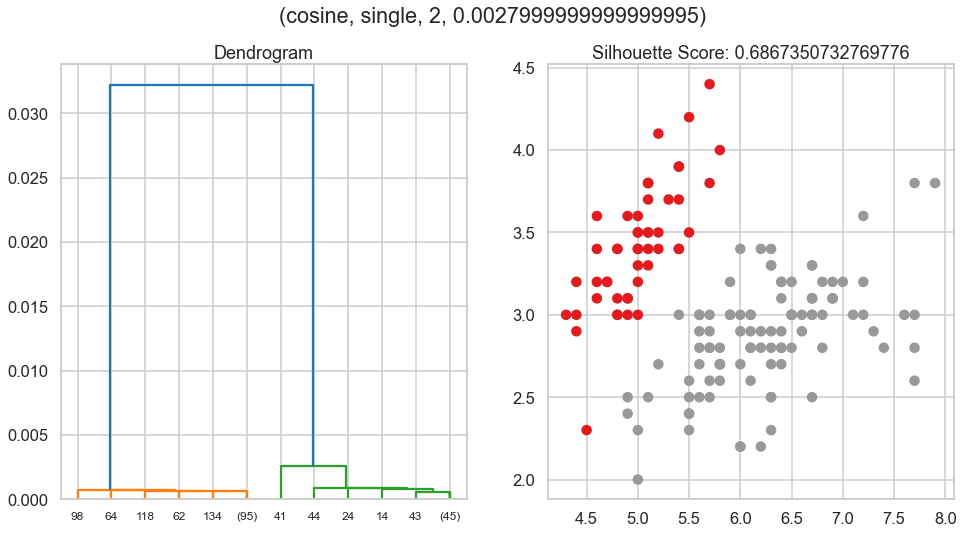

Best parameters: {'affinity': 'cityblock', 'linkage': 'average', 'num_clusters': {2}, 'distance_threshold': 3.5000000000000004}
Best silhouette score: 0.6867350732769776


In [41]:
perform_grid_search(iris_data.data)

###  DBSCAN


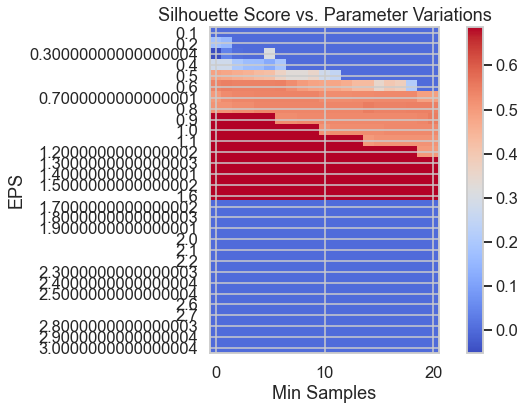

No handles with labels found to put in legend.


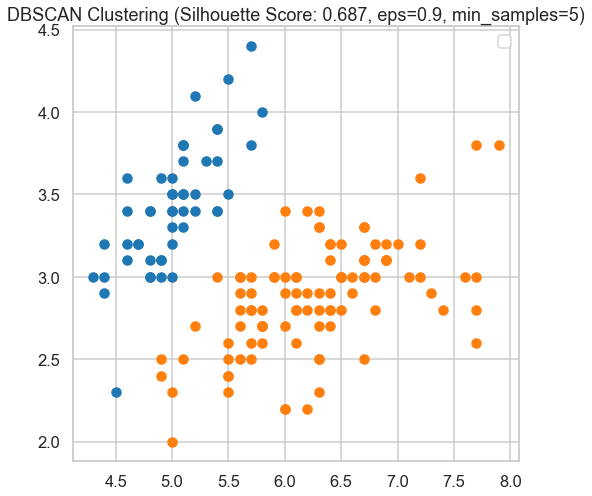

In [28]:
dbscanfunction(iris_data.data)

### GAUSSIAN


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
if(len(iris_data.data.shape)<2):
    gaussian(iris_data)


### IRIS NORMALIZED



* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris_data_norm = load_iris()
iris_data_norm.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data_norm.target_names)
['setosa', 'versicolor', 'virginica']


# Get the features and target values
X = iris_data_norm.data
y = iris_data_norm.target

# Normalize the feature values using the StandardScaler class
scaler = StandardScaler()
iris_normalized = scaler.fit_transform(X)


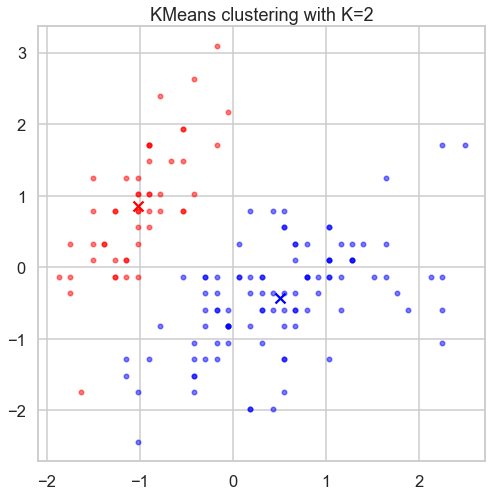

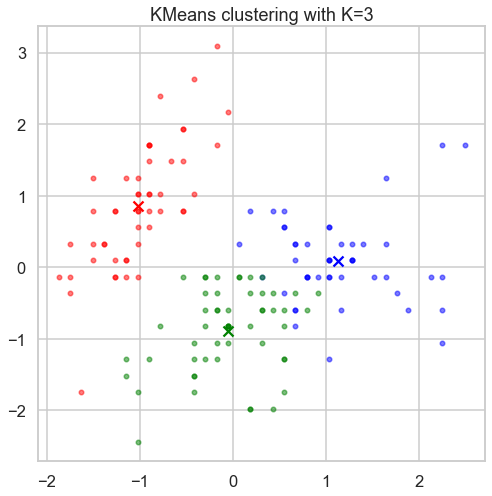

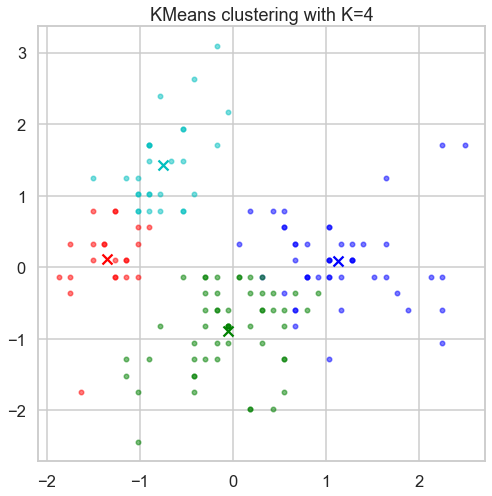

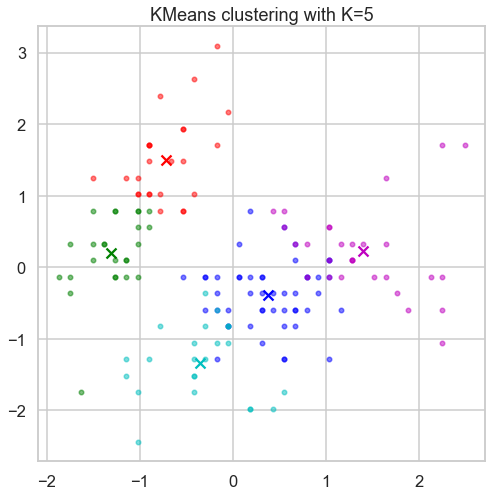

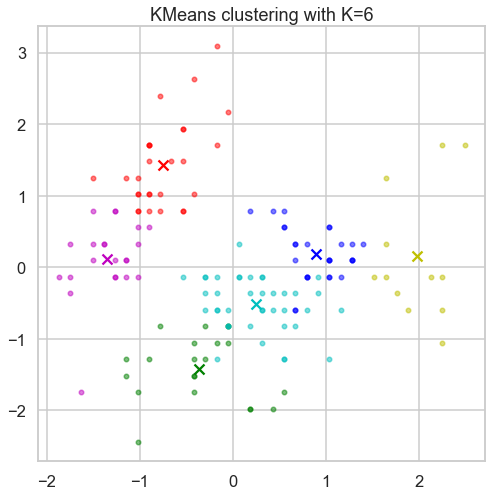

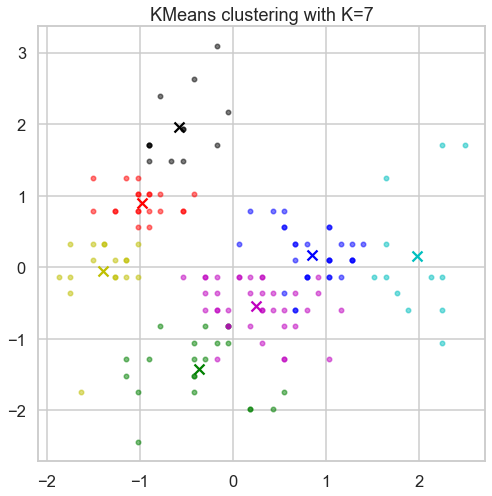

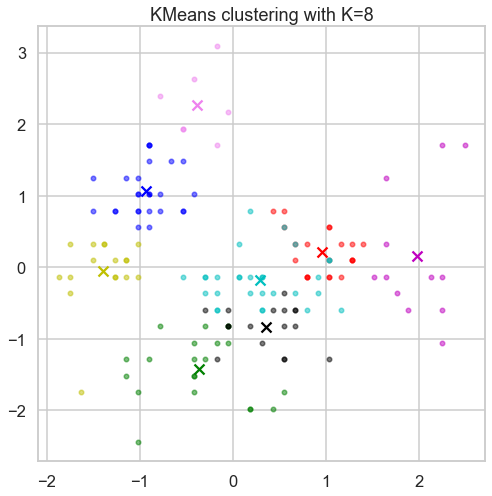

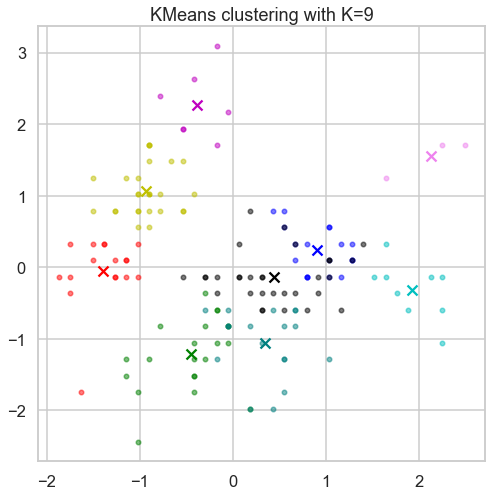

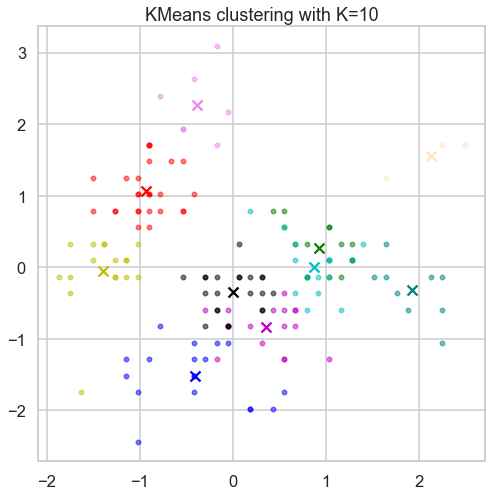

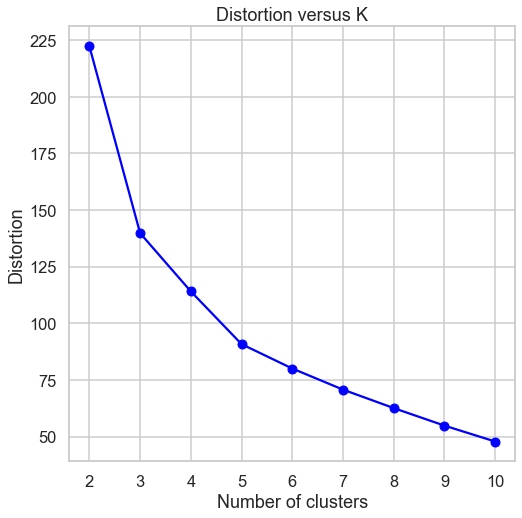

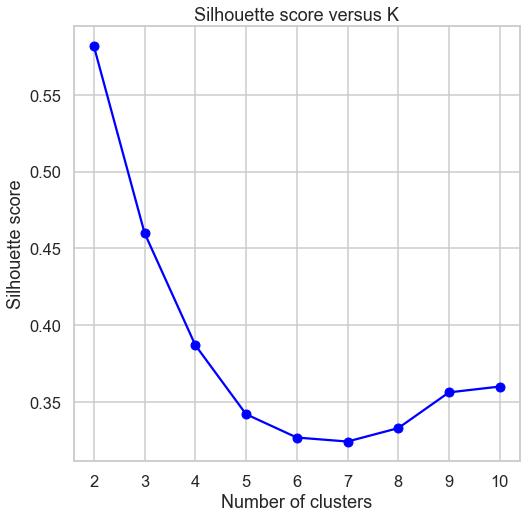

The best K based on silhouette score is 2
The silhouette score for the best K is 0.5817500491982808


In [18]:
kmeans_cluster(iris_normalized)

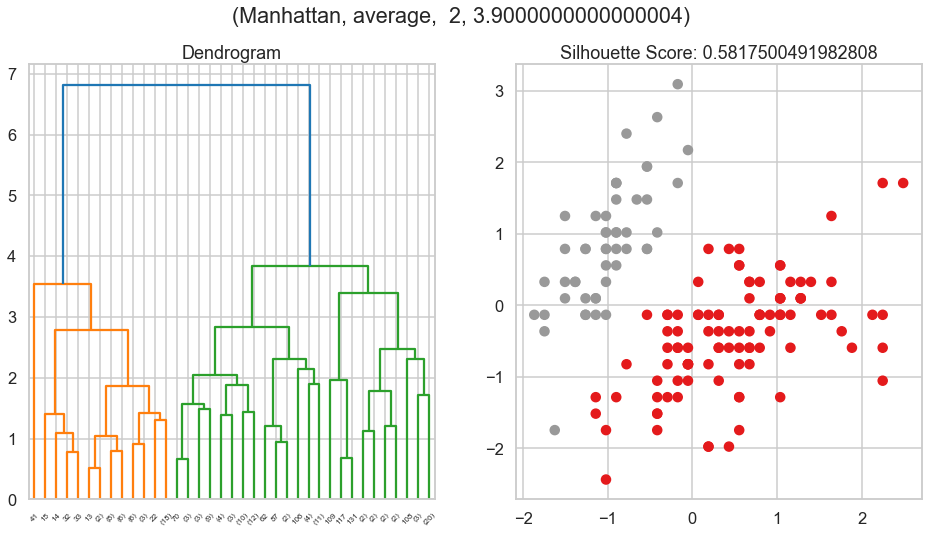

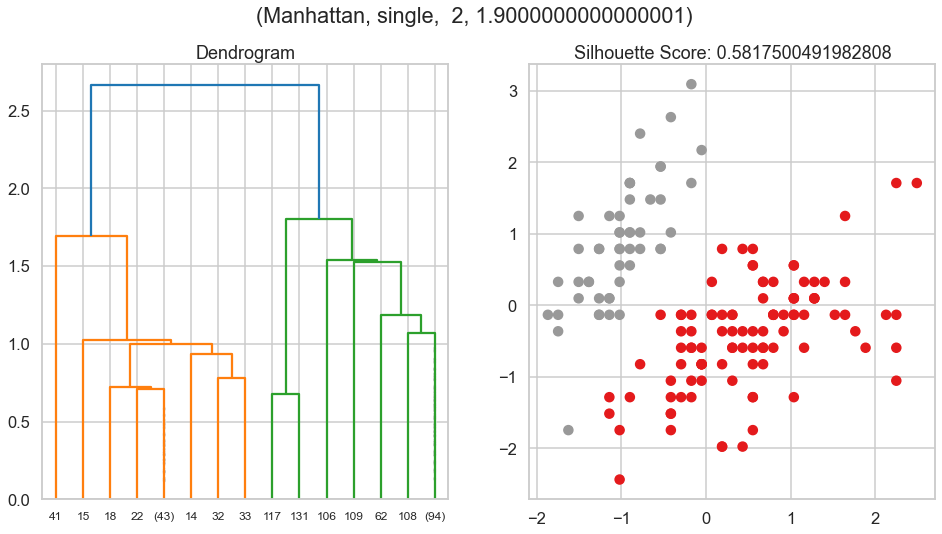

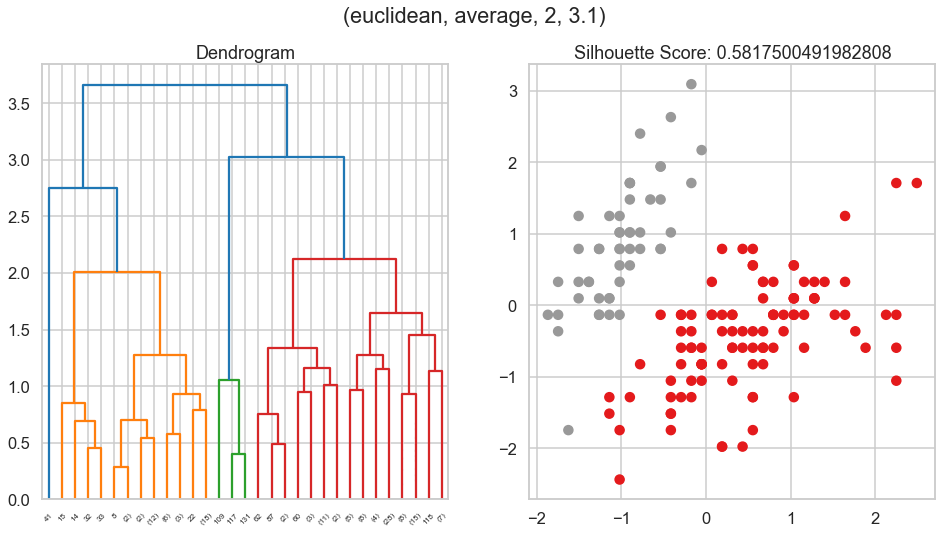

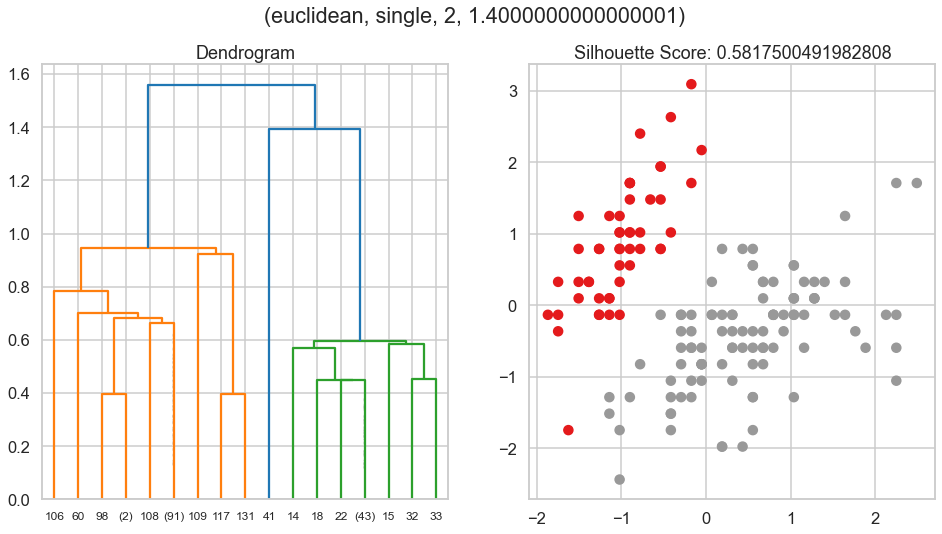

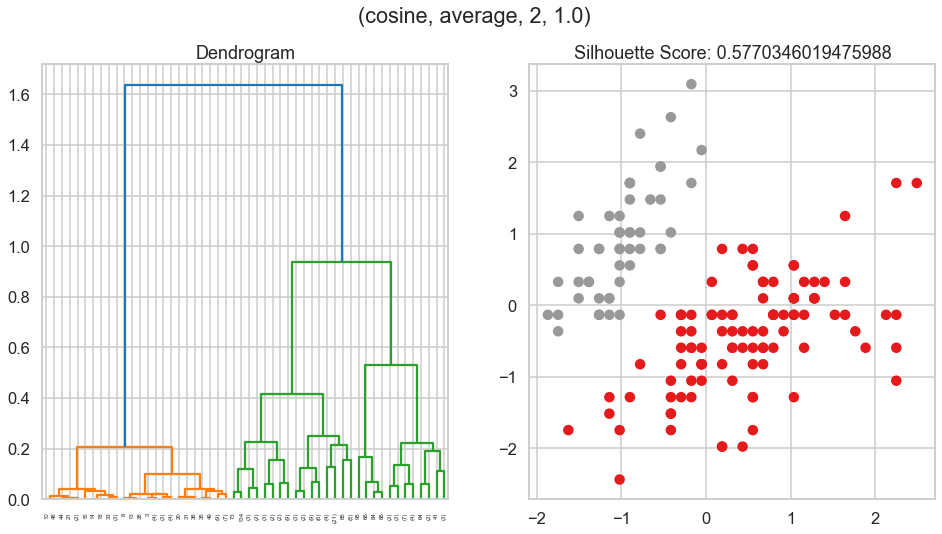

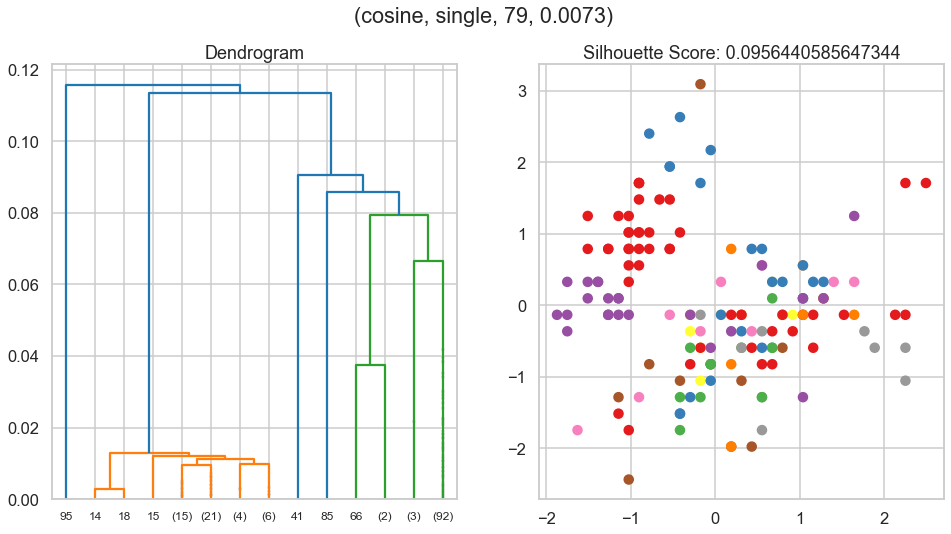

Best parameters: {'affinity': 'cityblock', 'linkage': 'average', 'num_clusters': {2}, 'distance_threshold': 3.9000000000000004}
Best silhouette score: 0.5817500491982808


In [42]:
perform_grid_search(iris_normalized)

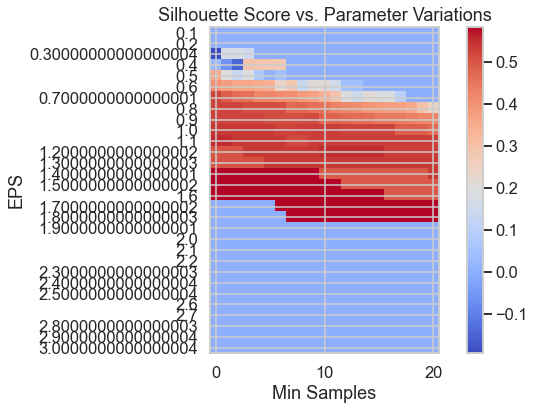

No handles with labels found to put in legend.


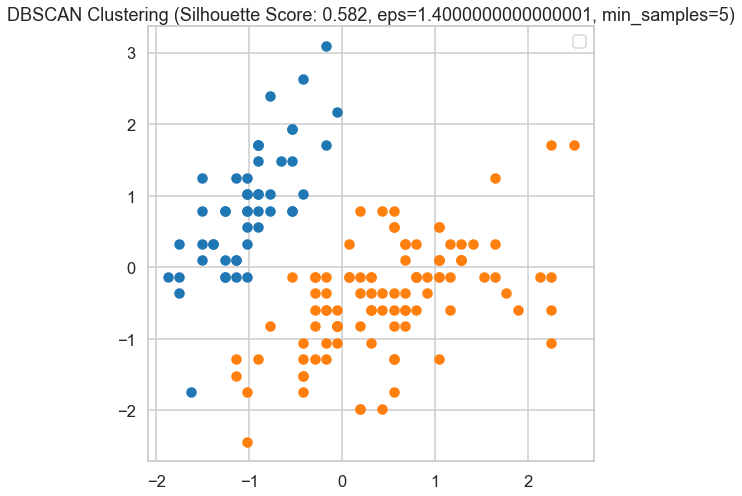

In [20]:
dbscanfunction(iris_normalized)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

if(len(iris_data.data.shape)<2):
    gaussian(iris_normalized)


## Customer dataset
Repeat all the above on the customer data set 

In [31]:
data = pd.read_csv("C:/Users/20127/Documents/GUC/SEMESTER 10 NEW/(NETW 1013) Machine Learning/assignment 1/Customer data.csv", index_col=0)

In [32]:
data = StandardScaler().fit_transform(data)

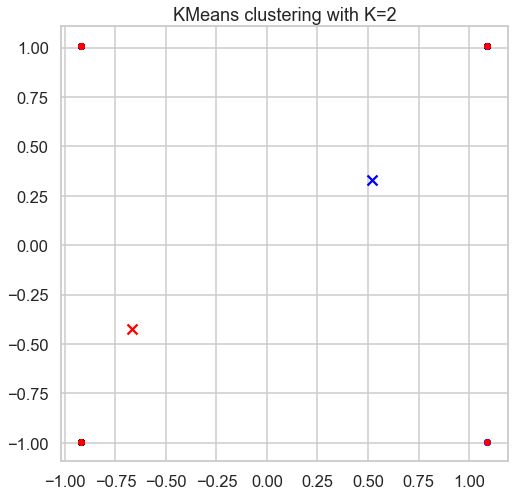

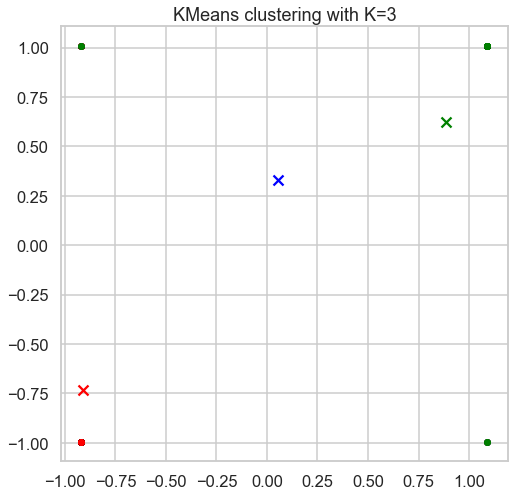

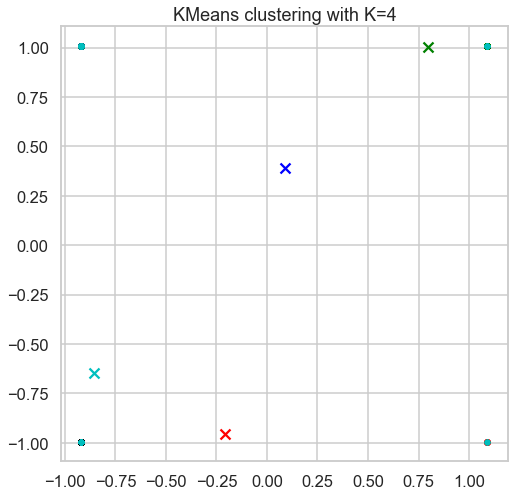

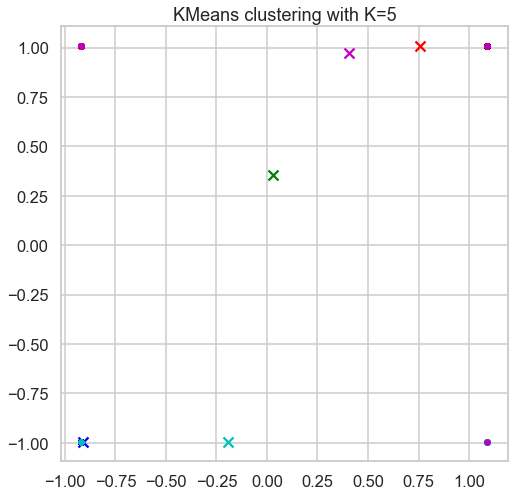

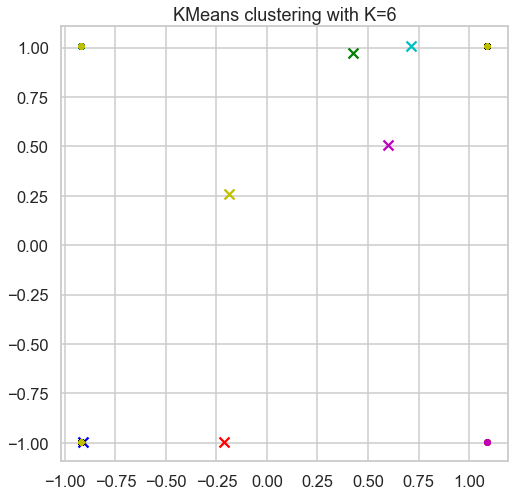

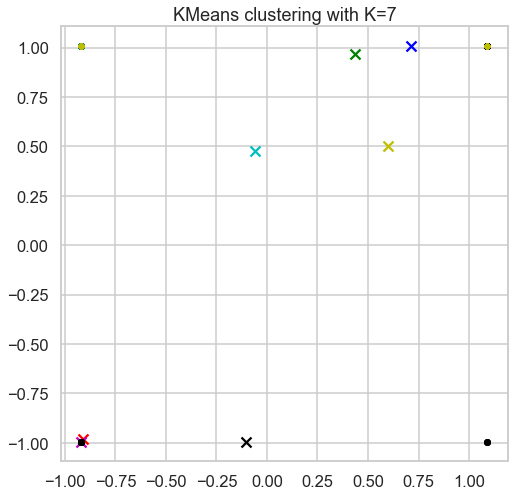

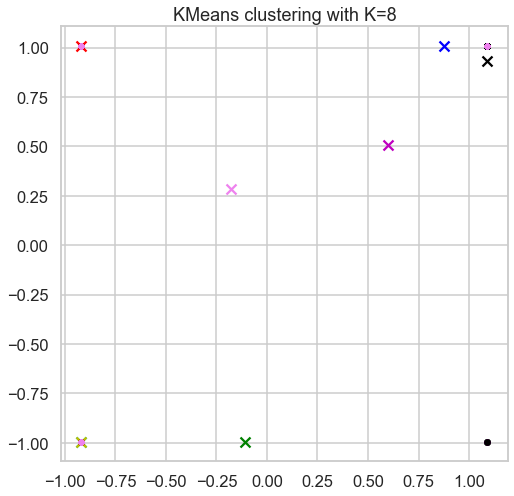

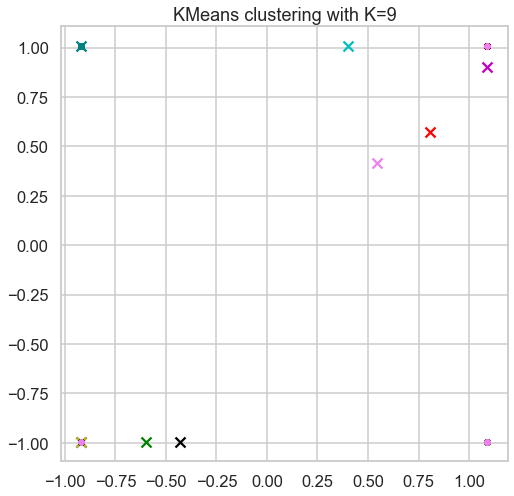

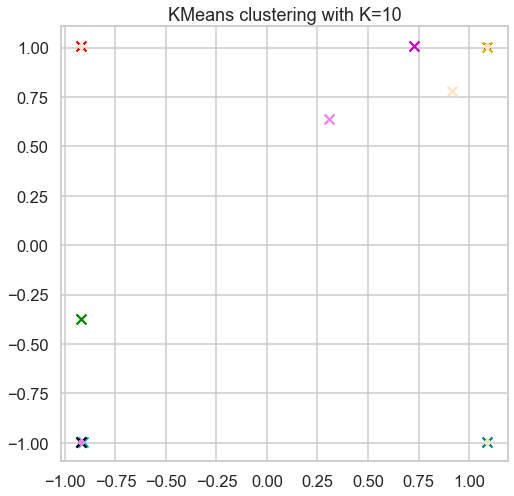

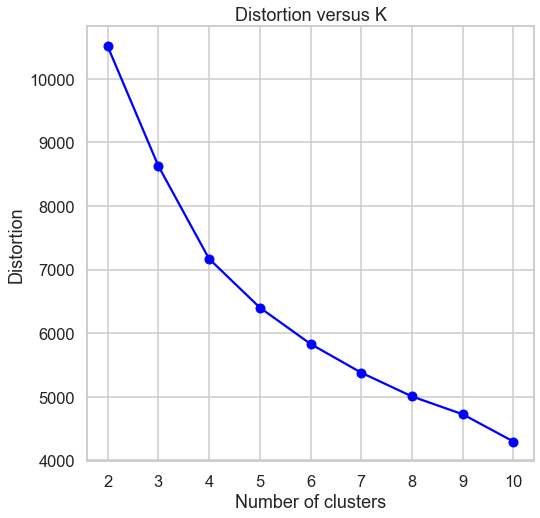

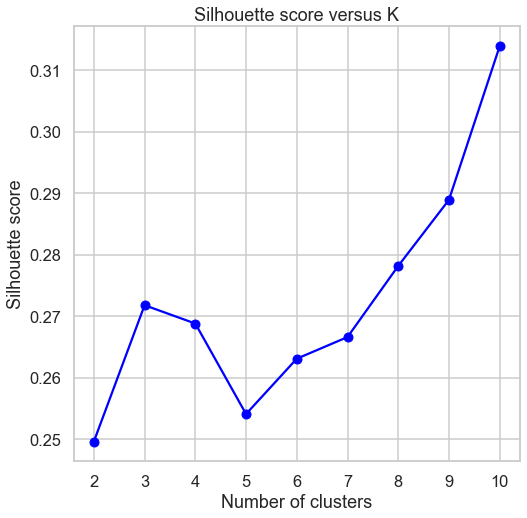

The best K based on silhouette score is 10
The silhouette score for the best K is 0.31388535770350495


In [24]:
kmeans_cluster(data)

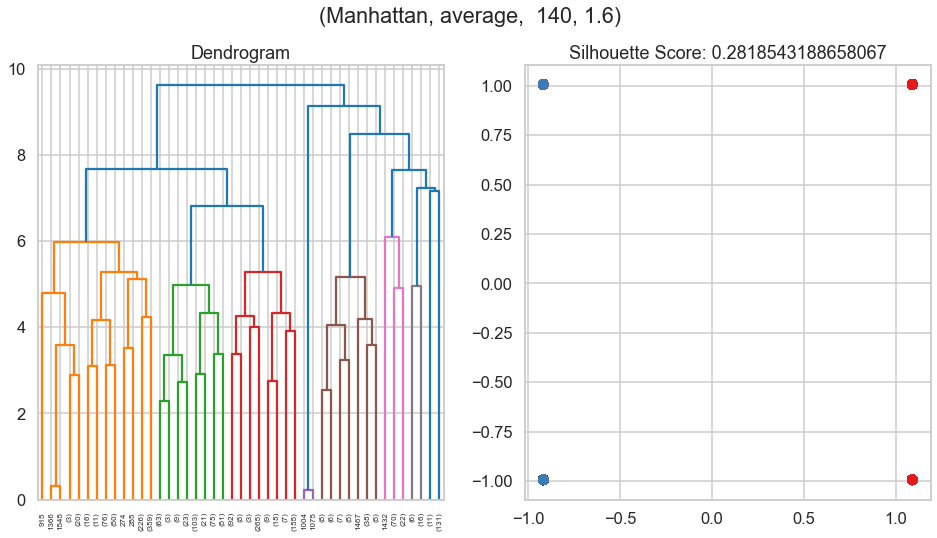

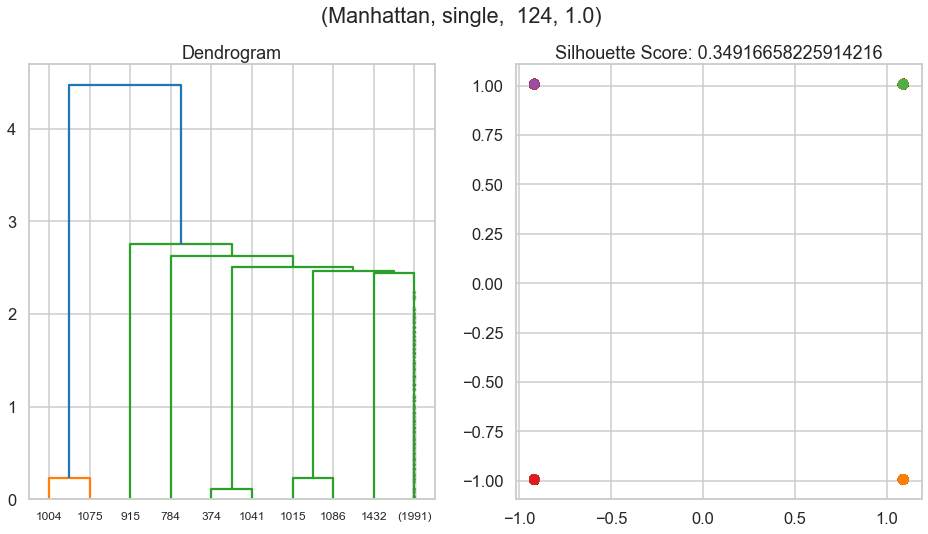

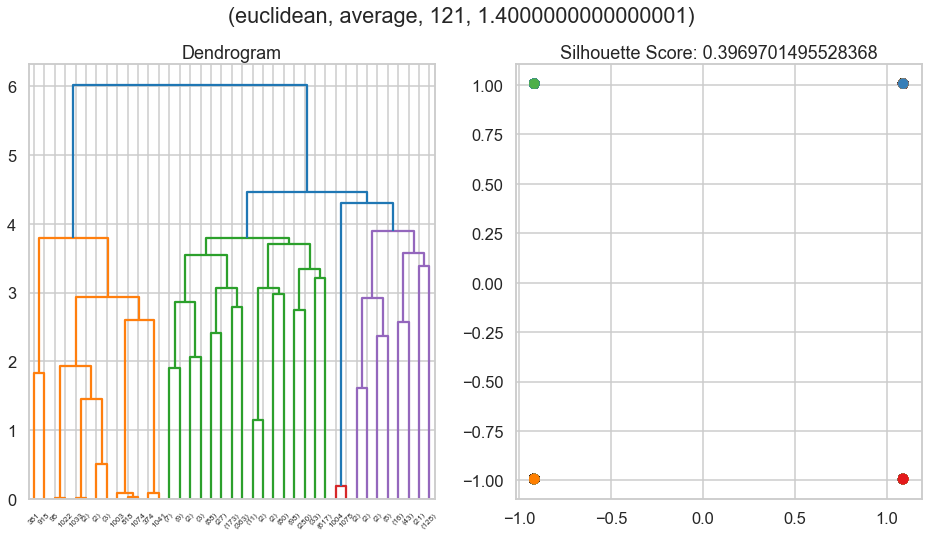

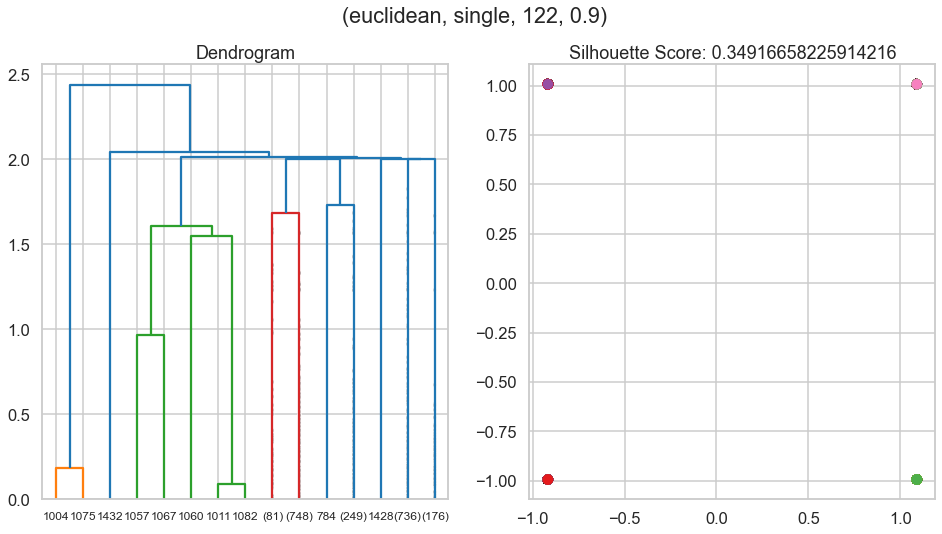

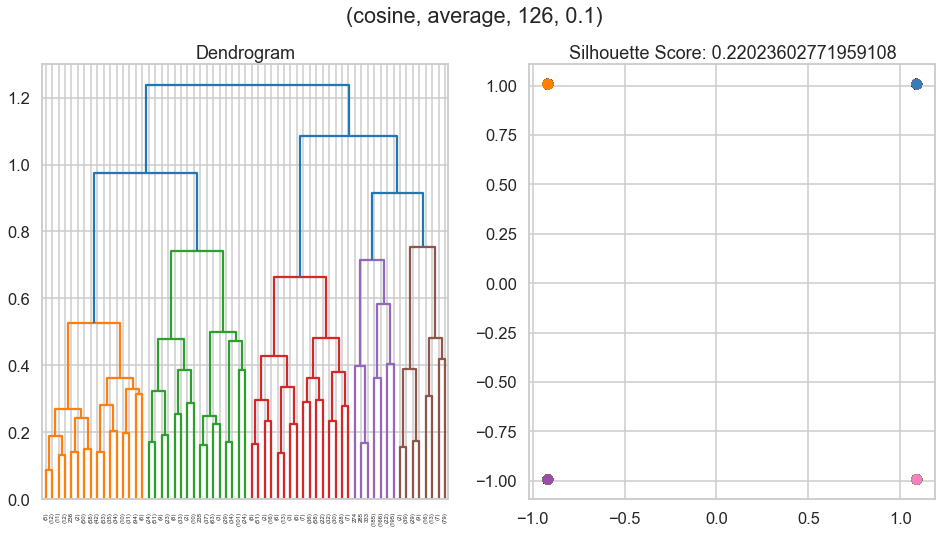

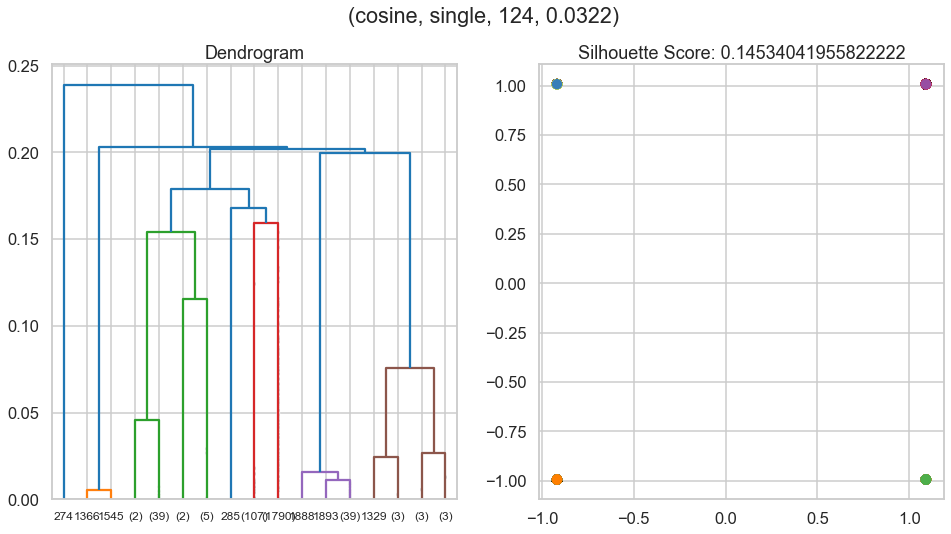

Best parameters: {'affinity': 'cityblock', 'linkage': 'average', 'num_clusters': {140}, 'distance_threshold': 1.6}
Best silhouette score: 0.4781201201259796


In [43]:
perform_grid_search(data)

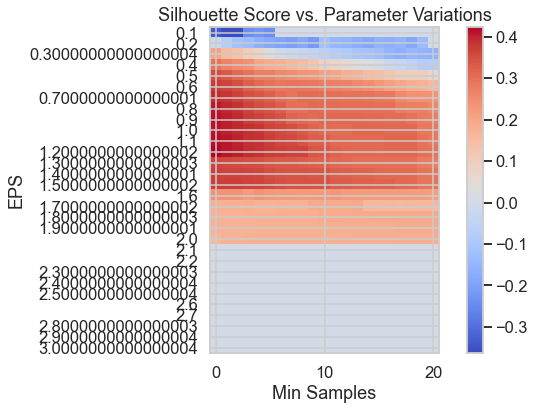

No handles with labels found to put in legend.


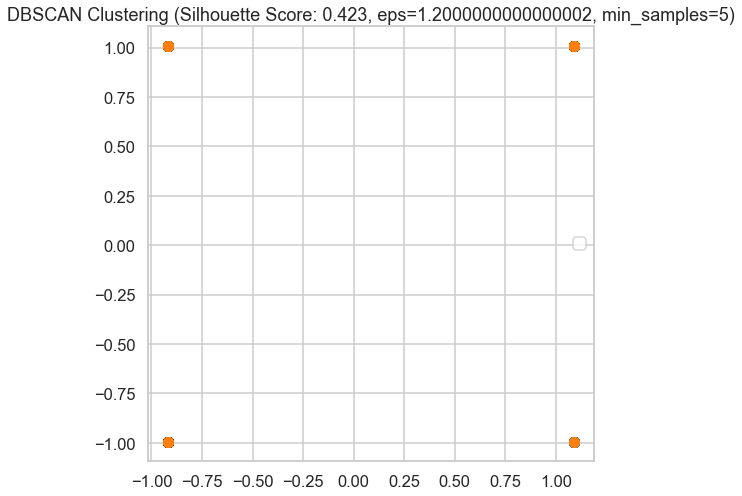

In [26]:
dbscanfunction(data)

In [27]:
if(len(data.shape)<2):
    gaussian(data)